In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as st
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('./Clean_Dataset.csv')
df = df.drop(columns='Unnamed: 0')

df.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [119]:
df.shape

(300153, 11)

Features

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

===================To boost learning, try to create an end-to-end

# Data preparation

## Check missing data

In [120]:
df.isnull().any()

airline             False
flight              False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool

## Check distribution

In [121]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


## Check fragmentation

In [122]:
pd.crosstab(df['departure_time'], columns= 'N')

col_0,N
departure_time,
Afternoon,47794
Early_Morning,66790
Evening,65102
Late_Night,1306
Morning,71146
Night,48015


In [123]:
pd.crosstab(df['arrival_time'], columns= 'N')

col_0,N
arrival_time,
Afternoon,38139
Early_Morning,15417
Evening,78323
Late_Night,14001
Morning,62735
Night,91538


In [124]:
pd.crosstab(df['class'], columns= 'N')

col_0,N
class,
Business,93487
Economy,206666


# EDA

<AxesSubplot:xlabel='price', ylabel='source_city'>

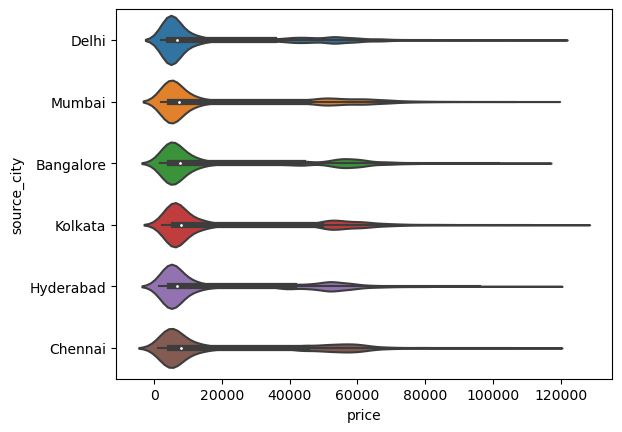

In [125]:
sns.violinplot(data = df, y = 'source_city', x = 'price')

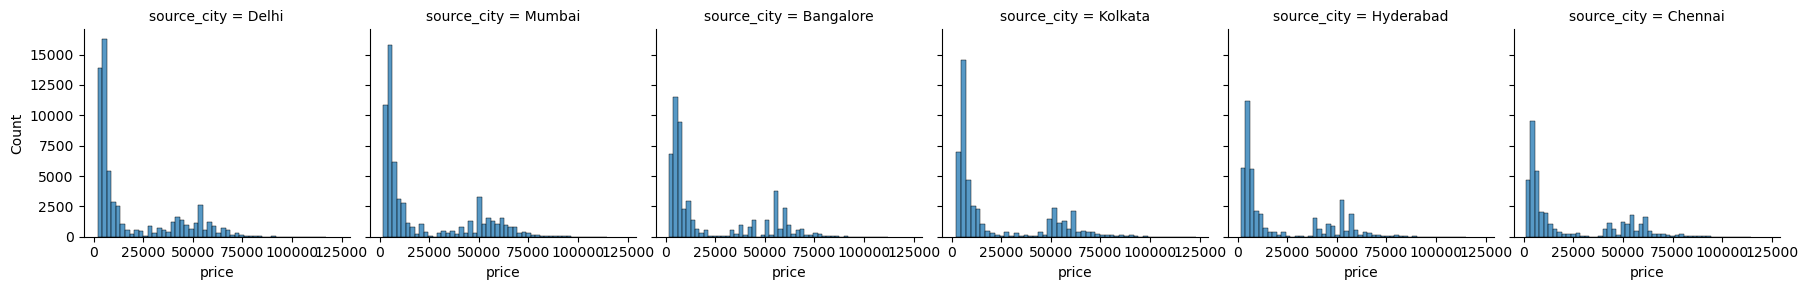

In [126]:
g = sns.FacetGrid(df, col = 'source_city')
g.map(sns.histplot, 'price',bins = 50)

<AxesSubplot:xlabel='price', ylabel='destination_city'>

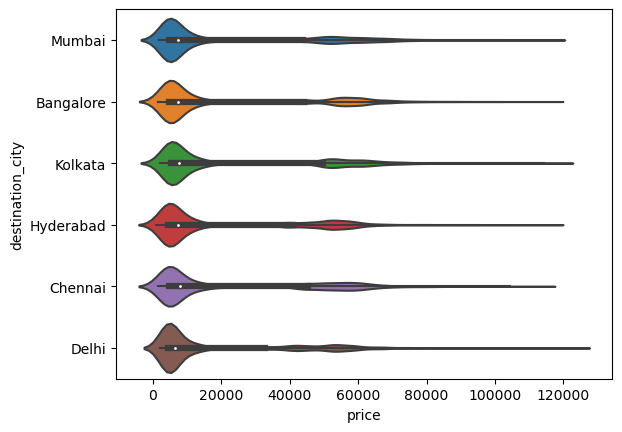

In [127]:
sns.violinplot(data = df, y = 'destination_city', x = 'price')

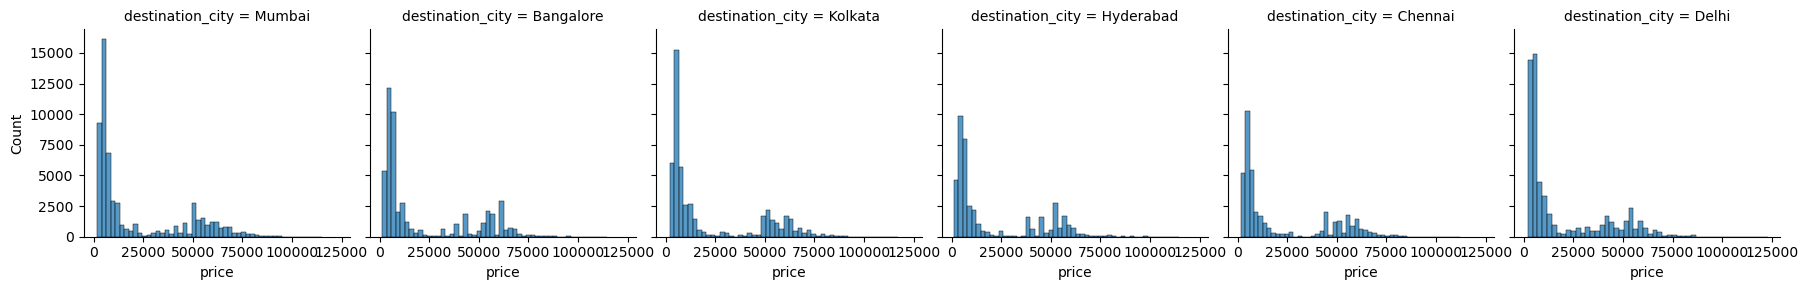

In [128]:
g = sns.FacetGrid(df, col = 'destination_city')
g.map(sns.histplot, 'price',bins = 50)

<AxesSubplot:xlabel='price', ylabel='arrival_time'>

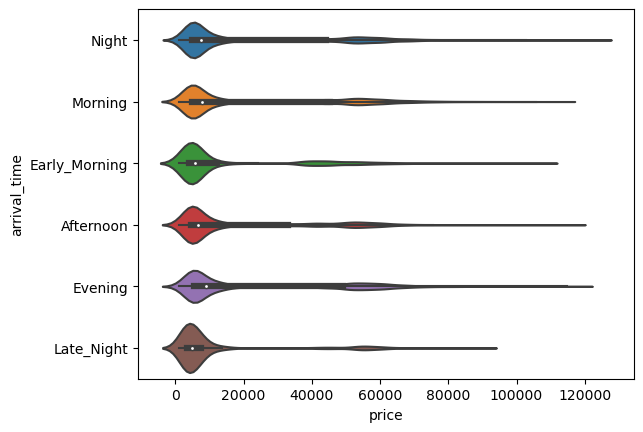

In [129]:
sns.violinplot(data = df, y = 'arrival_time', x = 'price')

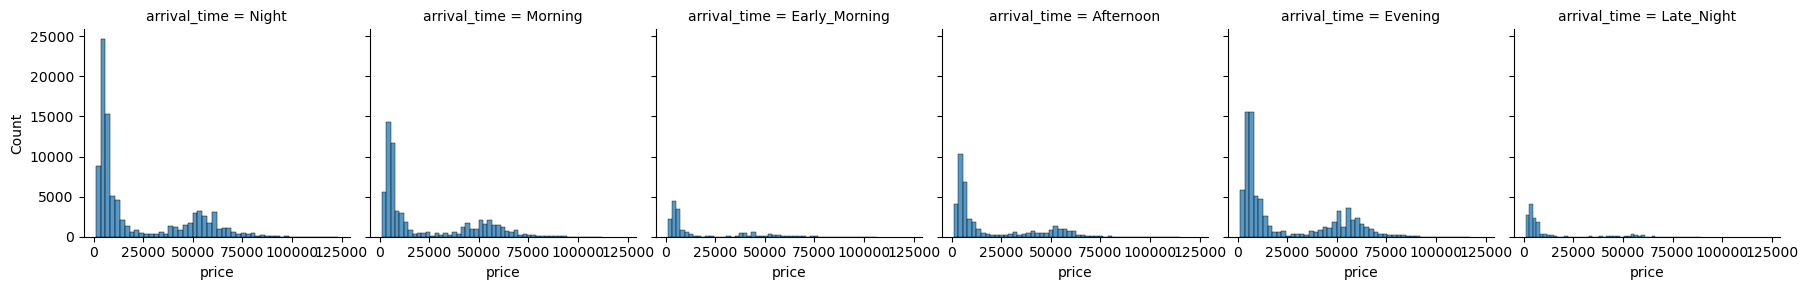

In [130]:
g = sns.FacetGrid(df, col = 'arrival_time')
g.map(sns.histplot, 'price',bins = 50)

<AxesSubplot:xlabel='price', ylabel='Count'>

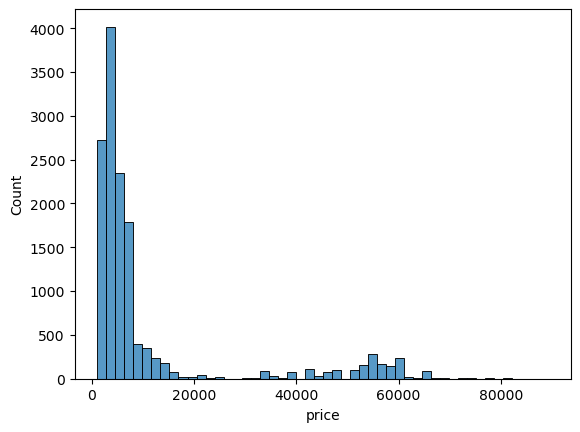

In [131]:
sns.histplot(data = df[df['arrival_time'] == 'Late_Night'], x = 'price', bins = 50)

<AxesSubplot:xlabel='price', ylabel='departure_time'>

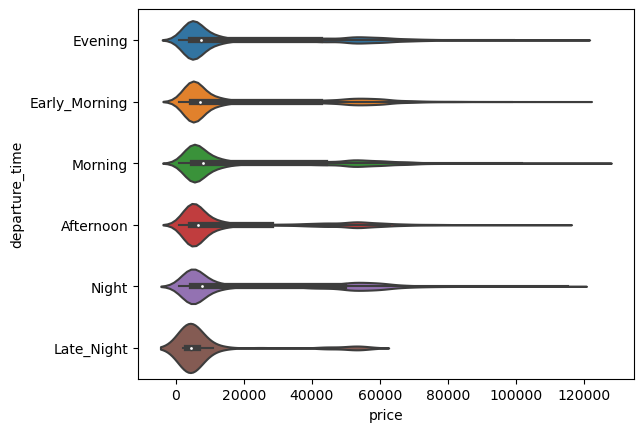

In [132]:
sns.violinplot(data = df, y = 'departure_time', x = 'price')

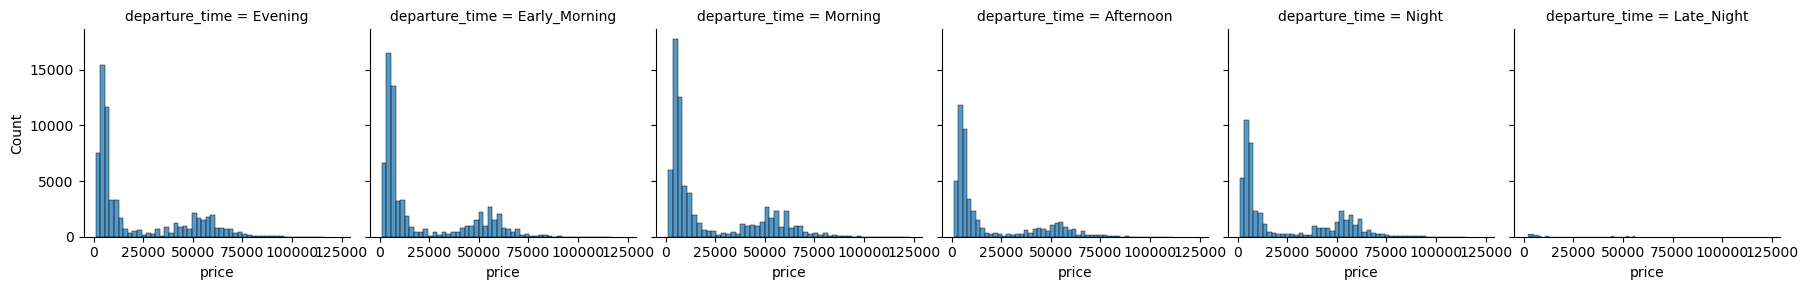

In [133]:
g = sns.FacetGrid(df, col = 'departure_time')
g.map(sns.histplot, 'price',bins = 50)

<AxesSubplot:xlabel='price', ylabel='Count'>

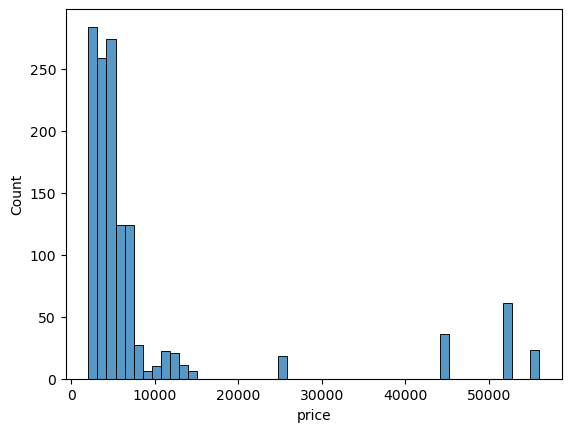

In [134]:
sns.histplot(data = df[df['departure_time'] == 'Late_Night'], x = 'price', bins = 50)

<AxesSubplot:xlabel='price', ylabel='stops'>

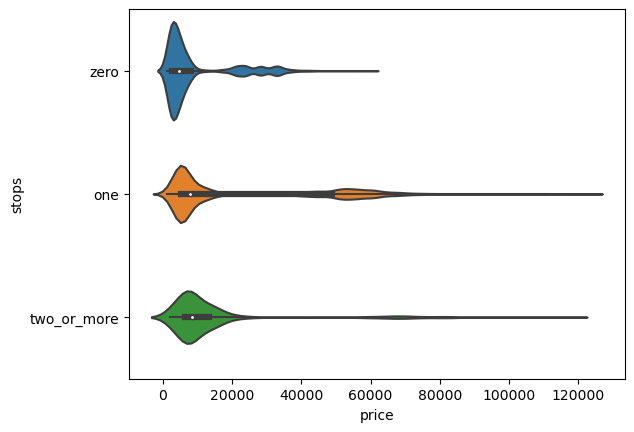

In [135]:
sns.violinplot(data = df, y = 'stops', x = 'price')

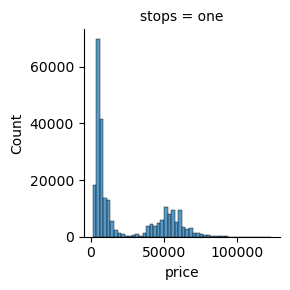

In [136]:
g = sns.FacetGrid(df[df['stops'] == 'one'], col = 'stops')
g.map(sns.histplot, 'price',bins = 50)

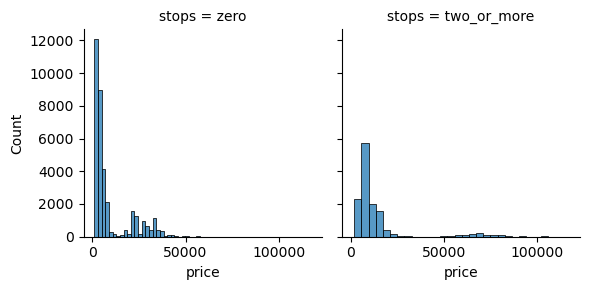

In [137]:
g = sns.FacetGrid(df[df['stops'] != 'one'], col = 'stops')
g.map(sns.histplot, 'price',bins = 30)

<AxesSubplot:xlabel='price', ylabel='airline'>

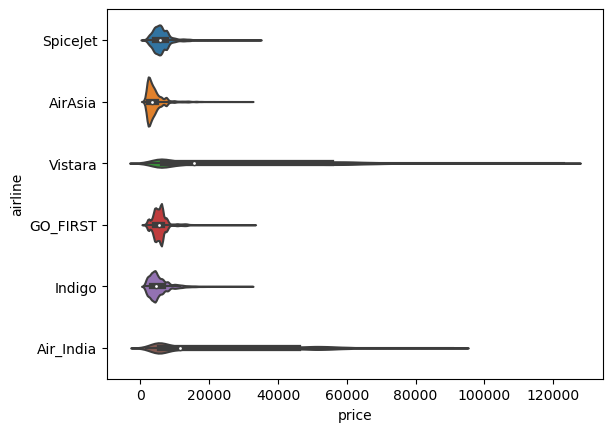

In [138]:
sns.violinplot(data = df, y = 'airline', x = 'price')

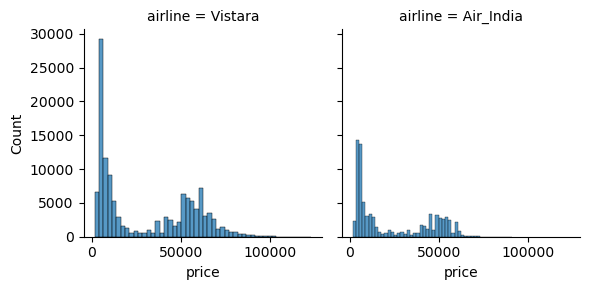

In [139]:
g = sns.FacetGrid(df[(df['airline'] == 'Vistara') | (df['airline'] == 'Air_India')], col = 'airline')
g.map(sns.histplot, 'price',bins = 50)

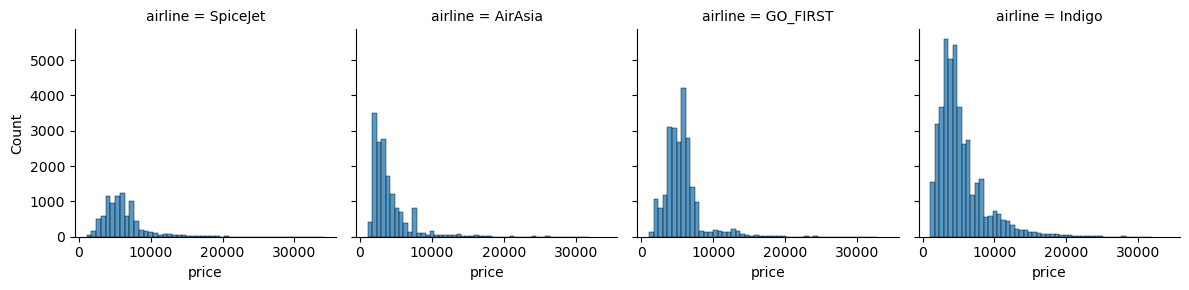

In [140]:
g = sns.FacetGrid(df[(df['airline'] != 'Vistara') & (df['airline'] != 'Air_India')], col = 'airline')
g.map(sns.histplot, 'price',bins = 50)

In [141]:
df.groupby('airline')['class'].unique()

airline
AirAsia                [Economy]
Air_India    [Economy, Business]
GO_FIRST               [Economy]
Indigo                 [Economy]
SpiceJet               [Economy]
Vistara      [Economy, Business]
Name: class, dtype: object

<AxesSubplot:>

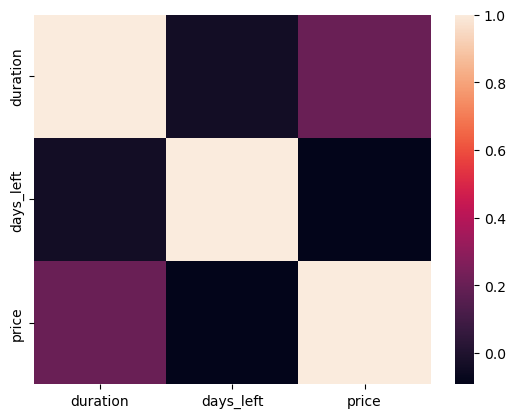

In [142]:
sns.heatmap(df.corr())

In [143]:
df.corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


<AxesSubplot:xlabel='duration', ylabel='price'>

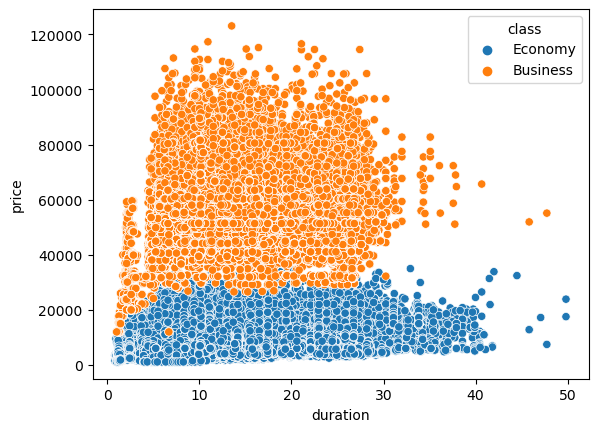

In [144]:
sns.scatterplot(data = df, x = 'duration', y = 'price', hue = 'class')

<AxesSubplot:xlabel='days_left', ylabel='price'>

c:\Users\mp1p5\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


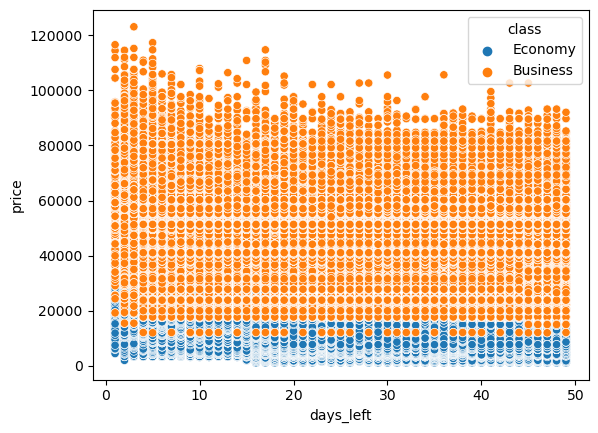

In [145]:
sns.scatterplot(data = df, x = 'days_left', y = 'price', hue = 'class')

<AxesSubplot:xlabel='price', ylabel='class'>

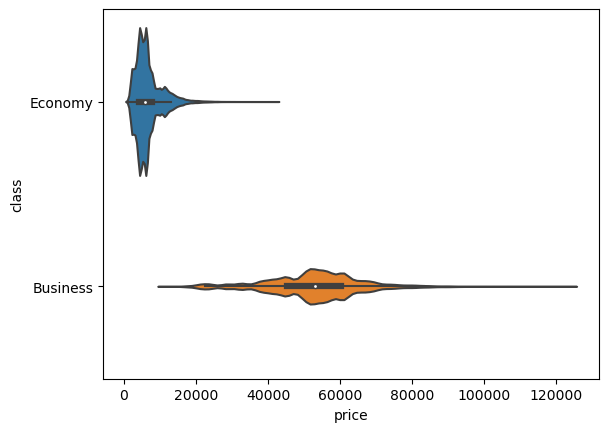

In [146]:
sns.violinplot(data = df, y = 'class', x = 'price')

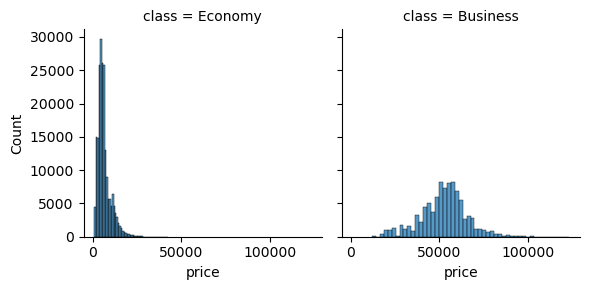

In [147]:
g = sns.FacetGrid(df, col = 'class')
g.map(sns.histplot, 'price',bins = 50)

## All the price distribution have two normal distribution due to class price differences

In [148]:
economy_df = df[df['class'] == 'Economy']
business_df = df[df['class'] == 'Business']

In [149]:
economy_df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [150]:
economy_df.shape

(206666, 11)

In [151]:
business_df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
206666,Air_India,AI-868,Delhi,Evening,zero,Evening,Mumbai,Business,2.00,1,25612
206667,Air_India,AI-624,Delhi,Evening,zero,Night,Mumbai,Business,2.25,1,25612
206668,Air_India,AI-531,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220
206669,Air_India,AI-839,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450
206670,Air_India,AI-544,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690


In [152]:
business_df.shape

(93487, 11)

### Economy

<AxesSubplot:xlabel='days_left', ylabel='price'>

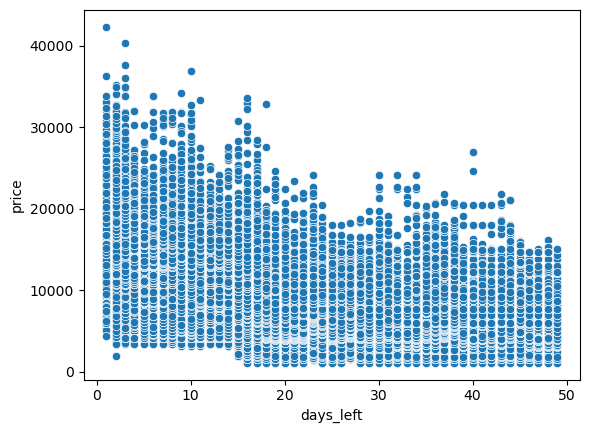

In [153]:
sns.scatterplot(data = economy_df, x = 'days_left', y = 'price')

<AxesSubplot:xlabel='days_left', ylabel='price'>

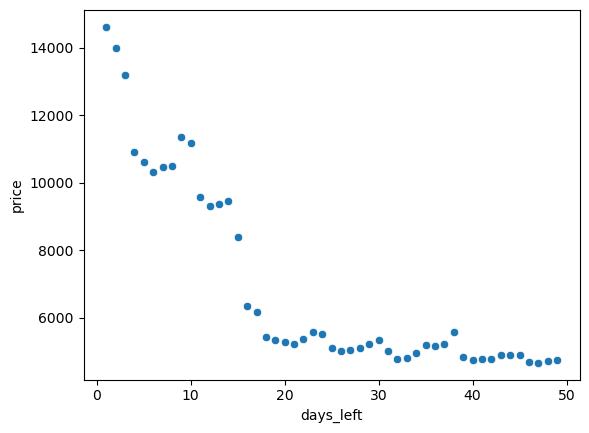

In [154]:
days_left_average_df = economy_df.groupby('days_left').mean()
sns.scatterplot(data = days_left_average_df, x = 'days_left', y = 'price')

In [155]:
days_left_average_df.head()

,duration,price
days_left,,
1,13.673666,14613.179410
2,13.278893,13980.828244
3,13.621834,13174.050992
4,13.015091,10901.386284
5,12.405979,10605.918315


In [156]:
days_left_average_df.shape

(49, 2)

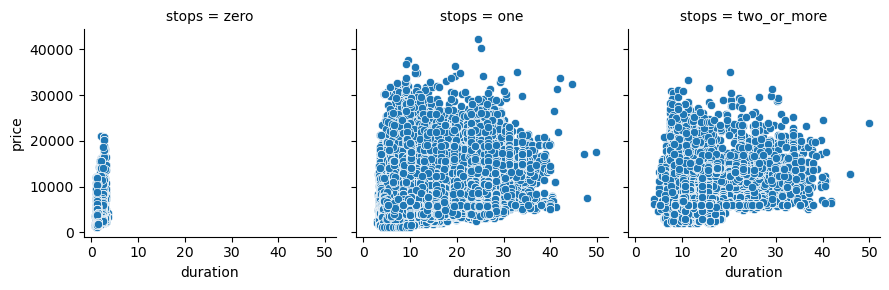

In [157]:
g = sns.FacetGrid(economy_df, col = 'stops')
g.map(sns.scatterplot, "duration", "price")

In [158]:
economy_df.corr()

,duration,days_left,price
duration,1.000000,-0.042537,0.288379
days_left,-0.042537,1.000000,-0.559551
price,0.288379,-0.559551,1.000000


<AxesSubplot:xlabel='price', ylabel='destination_city'>

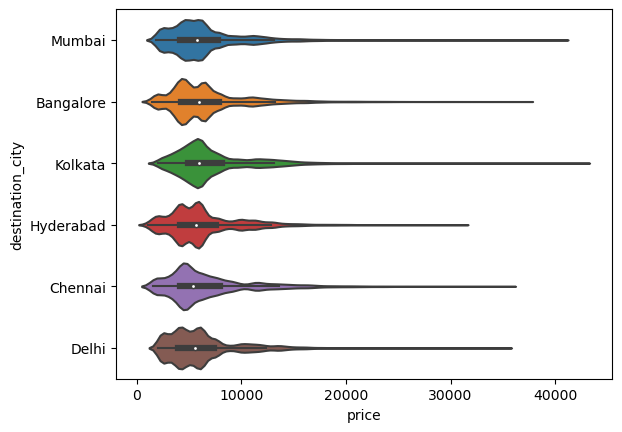

In [159]:
sns.violinplot(data = economy_df, y = 'destination_city', x = 'price')

<AxesSubplot:xlabel='price', ylabel='source_city'>

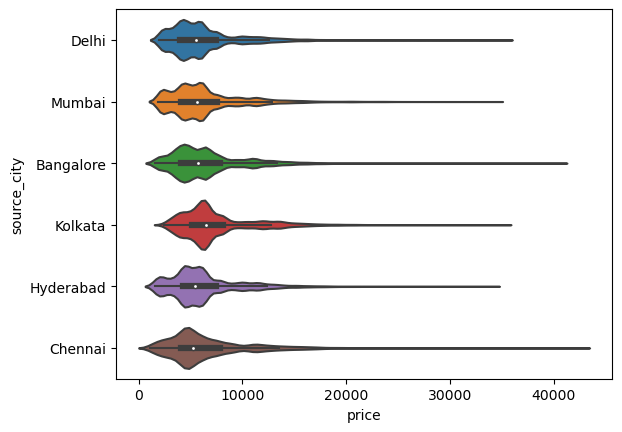

In [160]:
sns.violinplot(data = economy_df, y = 'source_city', x = 'price')

<AxesSubplot:xlabel='price', ylabel='departure_time'>

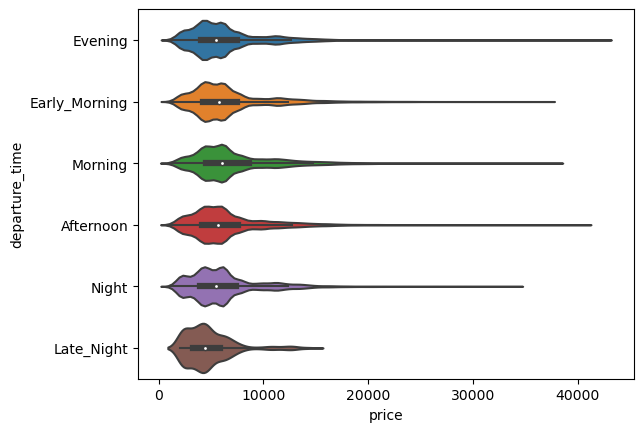

In [161]:
sns.violinplot(data = economy_df, y = 'departure_time', x = 'price')

<AxesSubplot:xlabel='price', ylabel='arrival_time'>

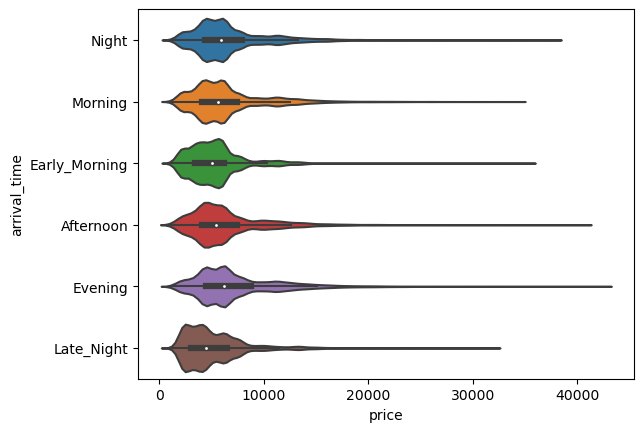

In [162]:
sns.violinplot(data = economy_df, y = 'arrival_time', x = 'price')

<AxesSubplot:xlabel='price', ylabel='airline'>

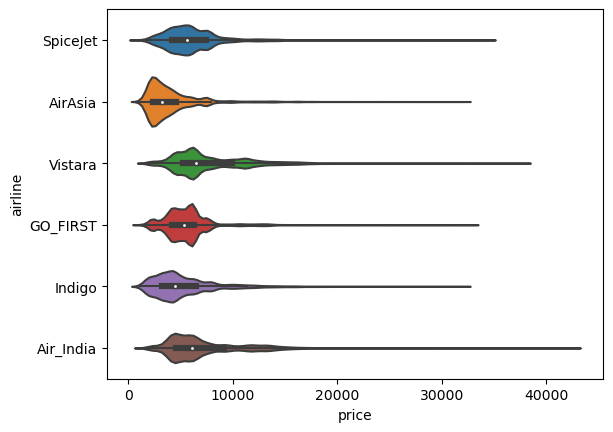

In [163]:
sns.violinplot(data = economy_df, y = 'airline', x = 'price')

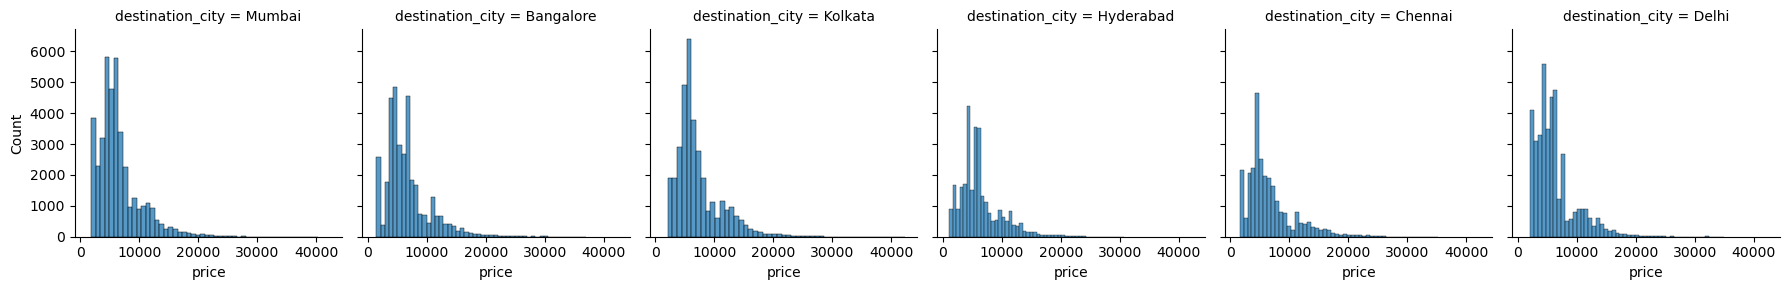

In [164]:
g = sns.FacetGrid(economy_df, col = 'destination_city')
g.map(sns.histplot,'price', bins = 50)

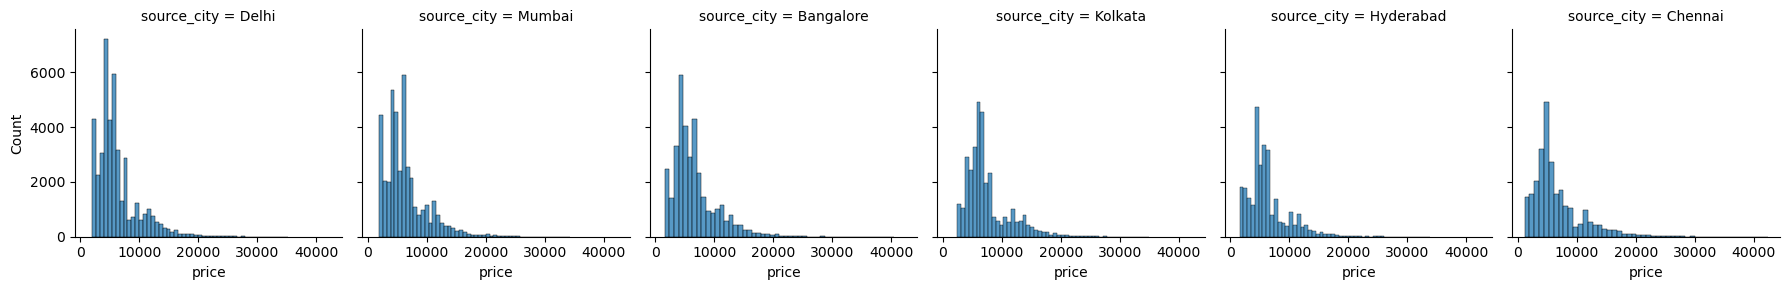

In [165]:
g = sns.FacetGrid(economy_df, col = 'source_city')
g.map(sns.histplot,'price', bins = 50)

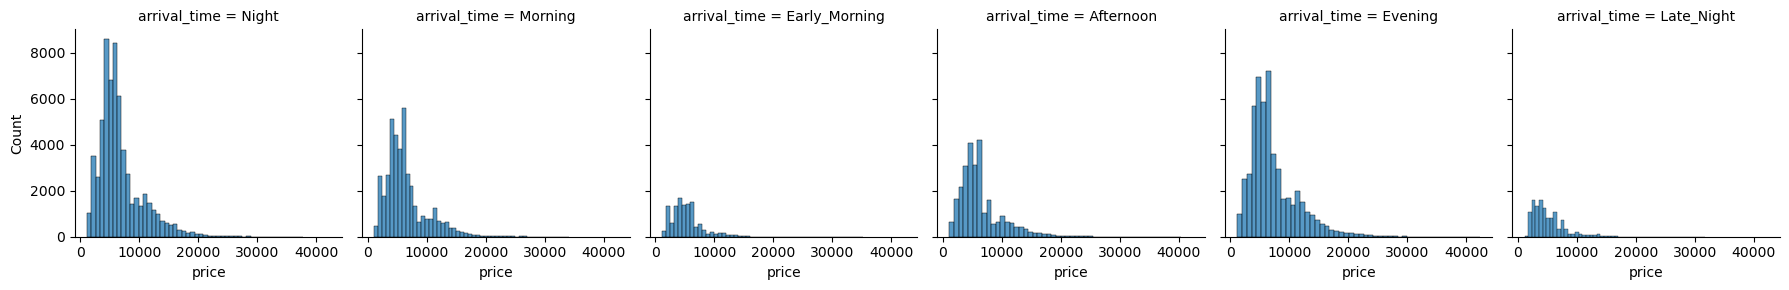

In [166]:
g = sns.FacetGrid(economy_df, col = 'arrival_time')
g.map(sns.histplot,'price', bins = 50)

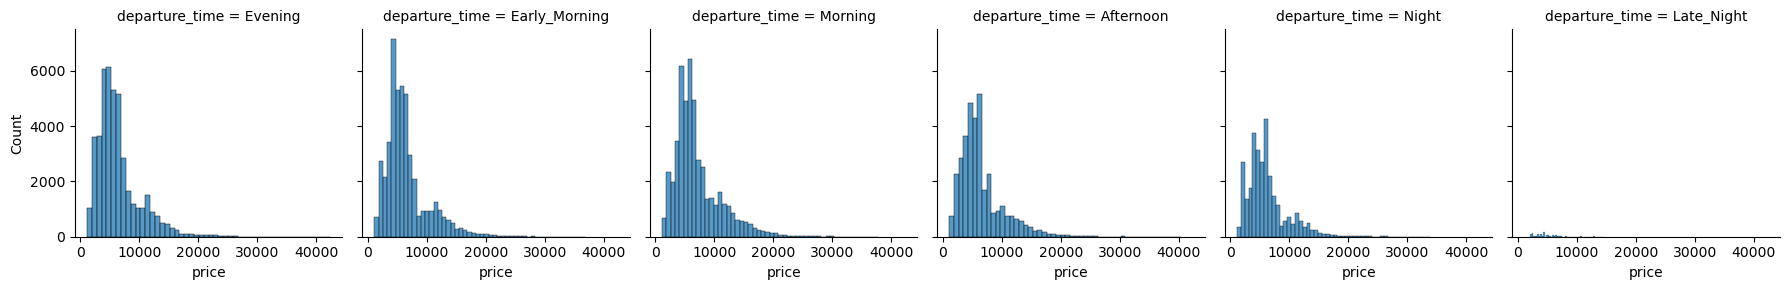

In [167]:
g = sns.FacetGrid(economy_df, col = 'departure_time')
g.map(sns.histplot,'price', bins = 50)

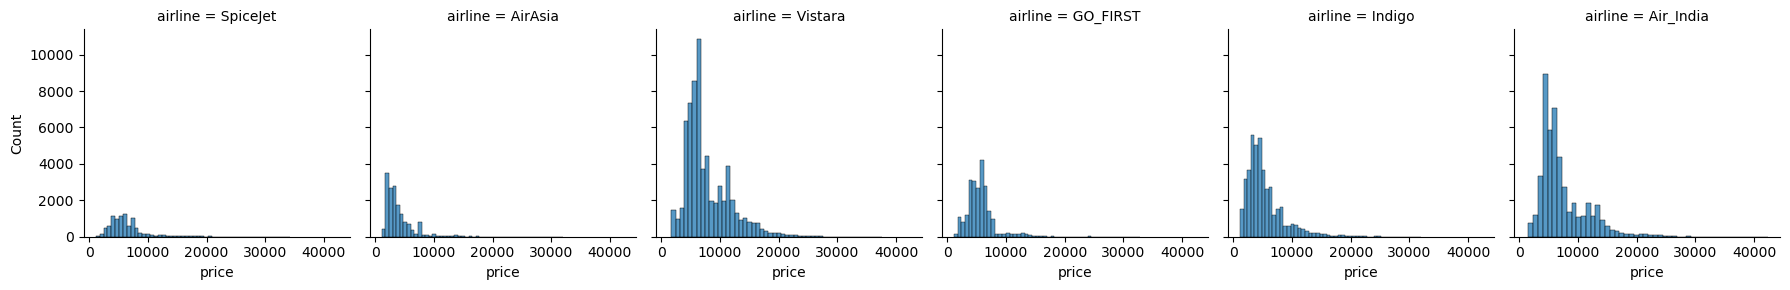

In [168]:
g = sns.FacetGrid(economy_df, col = 'airline')
g.map(sns.histplot,'price', bins = 50)

### Business

<AxesSubplot:xlabel='days_left', ylabel='price'>

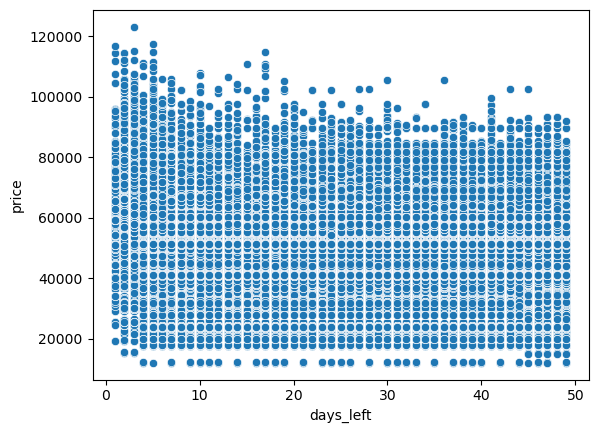

In [169]:
sns.scatterplot(data = business_df, x = 'days_left', y = 'price')

<AxesSubplot:xlabel='days_left', ylabel='price'>

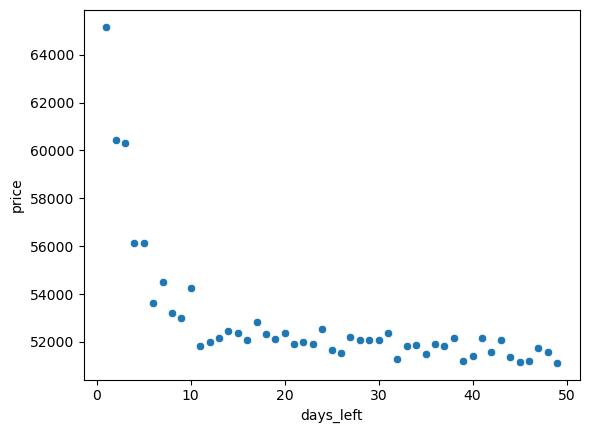

In [170]:
days_left_average_df = business_df.groupby('days_left').mean()
sns.scatterplot(data = days_left_average_df, x = 'days_left', y = 'price')

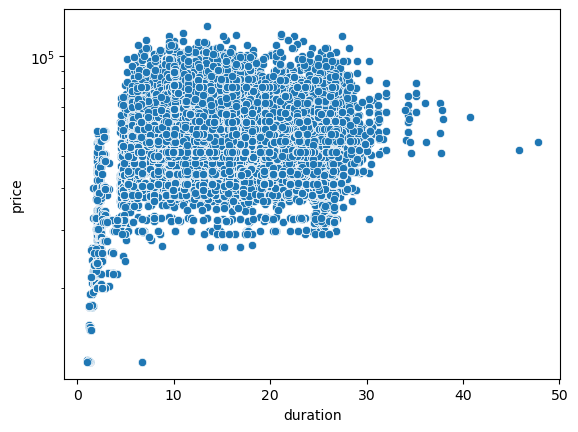

In [171]:
sns.scatterplot(data = business_df, x = 'duration', y = 'price')
plt.yscale('log')

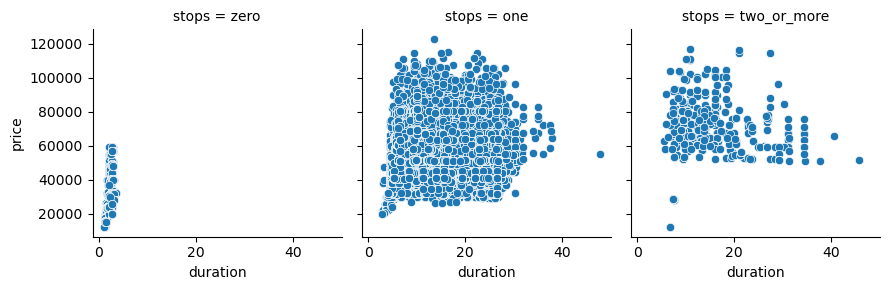

In [172]:
g = sns.FacetGrid(business_df, col = 'stops')
g.map(sns.scatterplot, "duration", "price")

<AxesSubplot:xlabel='price', ylabel='destination_city'>

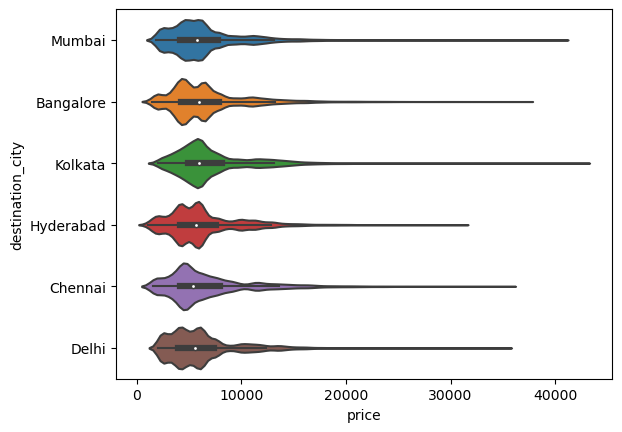

In [173]:
sns.violinplot(data = economy_df, y = 'destination_city', x = 'price')

<AxesSubplot:xlabel='price', ylabel='source_city'>

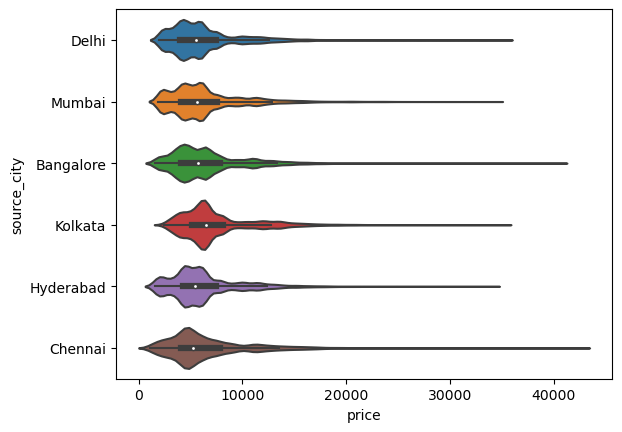

In [174]:
sns.violinplot(data = economy_df, y = 'source_city', x = 'price')

<AxesSubplot:xlabel='price', ylabel='arrival_time'>

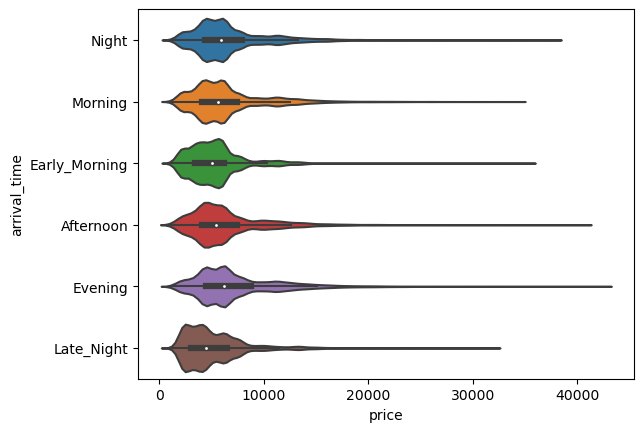

In [175]:
sns.violinplot(data = economy_df, y = 'arrival_time', x = 'price')

<AxesSubplot:xlabel='price', ylabel='departure_time'>

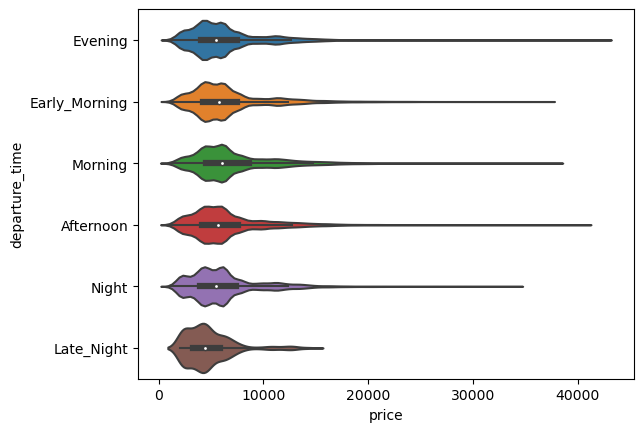

In [176]:
sns.violinplot(data = economy_df, y = 'departure_time', x = 'price')

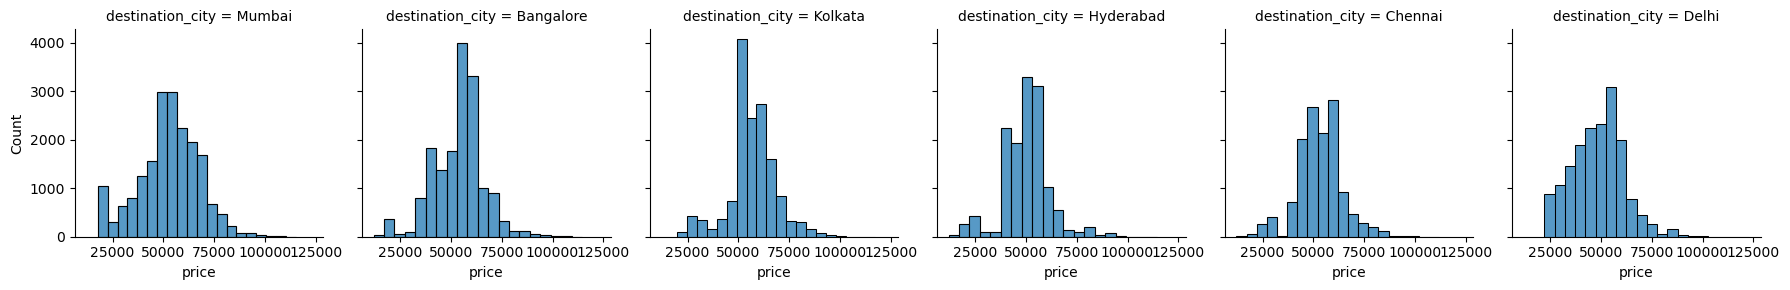

In [177]:
g = sns.FacetGrid(business_df, col = 'destination_city')
g.map(sns.histplot,'price', bins = 20)

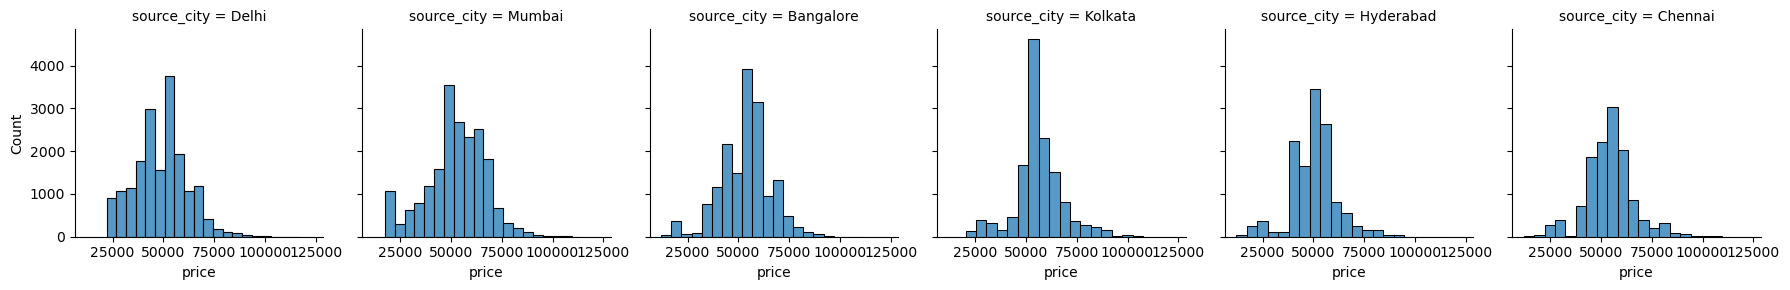

In [178]:
g = sns.FacetGrid(business_df, col = 'source_city')
g.map(sns.histplot,'price', bins = 20)

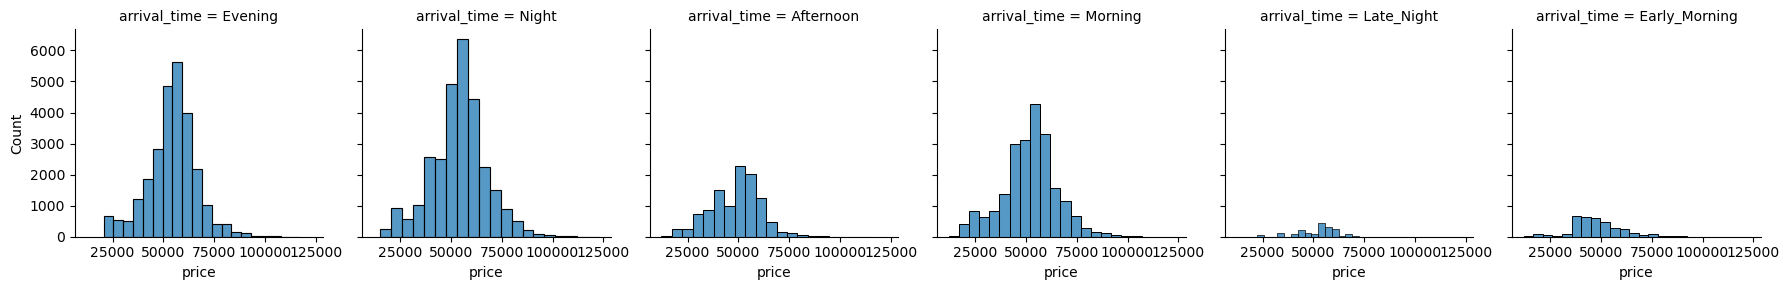

In [179]:
g = sns.FacetGrid(business_df, col = 'arrival_time')
g.map(sns.histplot,'price', bins = 20)

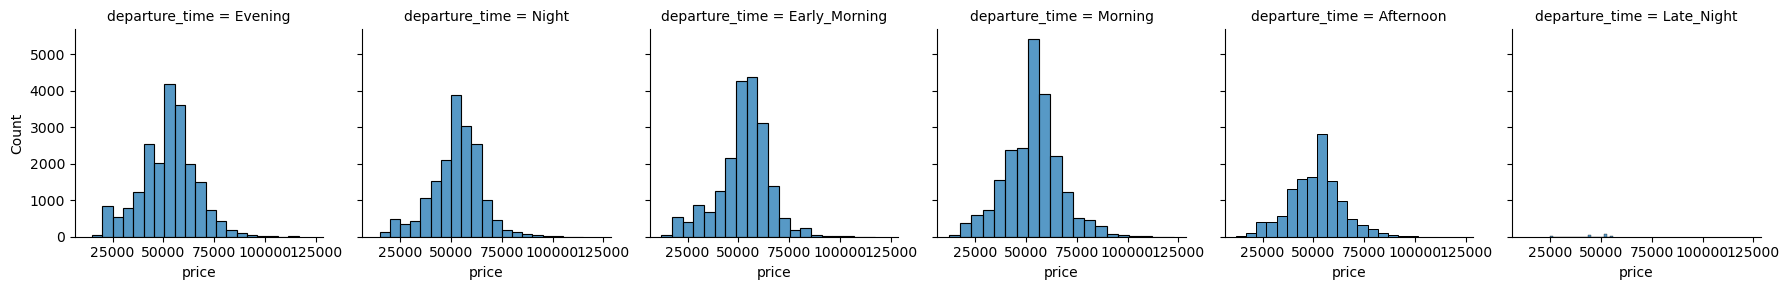

In [180]:
g = sns.FacetGrid(business_df, col = 'departure_time')
g.map(sns.histplot,'price', bins = 20)

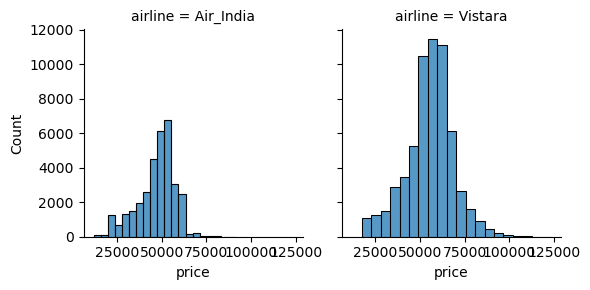

In [181]:
g = sns.FacetGrid(business_df, col = 'airline')
g.map(sns.histplot,'price', bins = 20)

## Find the correlation of IV

### perform encode on catagorical

In [182]:
new_df = df.copy()
new_df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [183]:
new_df.drop(columns = ['flight'], inplace = True)

new_df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


perform lebel encode

In [184]:
new_df['class'] = new_df['class'].str.replace('Economy', '0')
new_df['class'] = new_df['class'].str.replace('Business', '1')
new_df['stops'] = new_df['stops'].str.replace('zero', '0')
new_df['stops'] = new_df['stops'].str.replace('one', '1')
new_df['stops'] = new_df['stops'].str.replace('two_or_more', '2')

new_df['class'] = pd.to_numeric(new_df['class'])
new_df['stops'] = pd.to_numeric(new_df['stops'])

new_df.dtypes

airline              object
source_city          object
departure_time       object
stops                 int64
arrival_time         object
destination_city     object
class                 int64
duration            float64
days_left             int64
price                 int64
dtype: object

<AxesSubplot:>

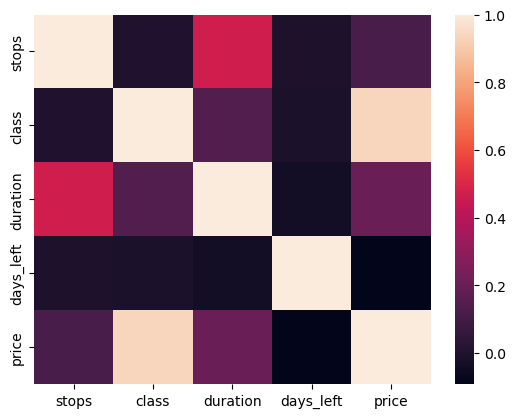

In [185]:
sns.heatmap(new_df.corr())

In [186]:
new_df.corr()['price'].sort_values(ascending = False)

price        1.000000
class        0.937860
duration     0.204222
stops        0.119648
days_left   -0.091949
Name: price, dtype: float64

In [187]:
categorical_col = ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city']

encoded_df = pd.get_dummies(new_df)

encoded_df.head()

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [188]:
encoded_df.corr()['price']

stops                           0.119648
class                           0.937860
duration                        0.204222
days_left                      -0.091949
price                           1.000000
airline_AirAsia                -0.176188
airline_Air_India               0.070041
airline_GO_FIRST               -0.194179
airline_Indigo                 -0.280882
airline_SpiceJet               -0.114019
airline_Vistara                 0.360816
source_city_Bangalore           0.011702
source_city_Chennai             0.018742
source_city_Delhi              -0.043282
source_city_Hyderabad          -0.012828
source_city_Kolkata             0.016127
source_city_Mumbai              0.013206
departure_time_Afternoon       -0.051968
departure_time_Early_Morning   -0.012232
departure_time_Evening          0.007946
departure_time_Late_Night      -0.033768
departure_time_Morning          0.018199
departure_time_Night            0.041768
arrival_time_Afternoon         -0.040258
arrival_time_Ear

<AxesSubplot:>

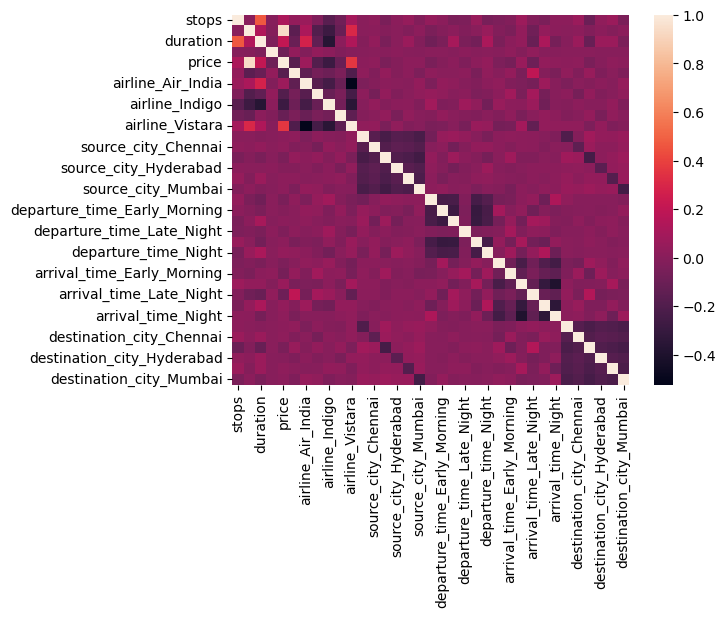

In [189]:
sns.heatmap(encoded_df.corr())

In [190]:
encoded_df.corr()['price'].abs().sort_values(ascending = False)

price                           1.000000
class                           0.937860
airline_Vistara                 0.360816
airline_Indigo                  0.280882
duration                        0.204222
airline_GO_FIRST                0.194179
airline_AirAsia                 0.176188
stops                           0.119648
airline_SpiceJet                0.114019
arrival_time_Late_Night         0.093602
days_left                       0.091949
airline_Air_India               0.070041
arrival_time_Early_Morning      0.060449
arrival_time_Evening            0.056408
destination_city_Delhi          0.052527
departure_time_Afternoon        0.051968
source_city_Delhi               0.043282
departure_time_Night            0.041768
arrival_time_Afternoon          0.040258
departure_time_Late_Night       0.033768
arrival_time_Morning            0.030379
destination_city_Kolkata        0.020956
arrival_time_Night              0.020344
source_city_Chennai             0.018742
destination_city

# Train model

## encode dataset

In [191]:
#ohe = preprocessing.OneHotEncoder(sparse=False)
scaler = preprocessing.StandardScaler()
#one_hot_df = ohe.fit_transform(new_df[categorical_col])
#scaled_df = scaler.fit_transform(new_df.drop(columns = (categorical_col + ['price'])))

#x = np.concatenate([scaled_df, one_hot_df], axis = 1)

x = pd.get_dummies(new_df).drop(columns=['price'])
x_col = x.columns
x = scaler.fit_transform(x)

y = new_df['price']

x

array([[-2.32177945, -0.67257558, -1.39753079, ..., -0.40739817,
        -0.44457466,  2.01965066],
       [-2.32177945, -0.67257558, -1.3752838 , ..., -0.40739817,
        -0.44457466,  2.01965066],
       [-2.32177945, -0.67257558, -1.39753079, ..., -0.40739817,
        -0.44457466,  2.01965066],
       ...,
       [ 0.19012088,  1.48682175,  0.22371837, ...,  2.45460113,
        -0.44457466, -0.49513513],
       [ 0.19012088,  1.48682175, -0.30881888, ...,  2.45460113,
        -0.44457466, -0.49513513],
       [ 0.19012088,  1.48682175, -0.29769538, ...,  2.45460113,
        -0.44457466, -0.49513513]])

## Train dataset

<AxesSubplot:xlabel='trial', ylabel='r2_score'>

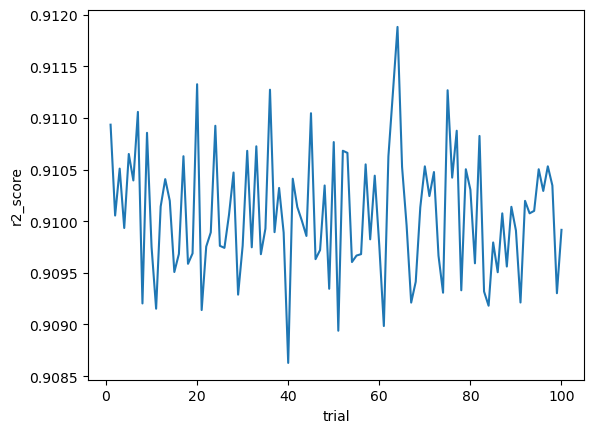

In [192]:
regr_score = []
num = []

for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

    regr = LinearRegression()
    regr.fit(x_train, y_train)

    regr_score.append(regr.score(x_test, y_test))
    num.append(i+1)

d = {'trial' : num, 'r2_score': regr_score}
sns.lineplot(data = d, x = 'trial', y = 'r2_score')

In [193]:
print('Average Score = ' + str(st.mean(regr_score)) + '\nMedian = ' + str(st.median(regr_score)) + '\nStandard deviation = ' + str(st.stdev(regr_score)))

Average Score = 0.9100759301950411
Median = 0.9100581378822861
Standard deviation = 0.0006120311633247629


## Feature

In [194]:
for i in range (0, len(x_col)):
    print(" " + x_col[i] + " " + str(regr.coef_[i]))

 stops 2261.040840248961
 class 20893.58016147444
 duration 594.8445937103679
 days_left -1741.947866394679
 airline_AirAsia 91483410604792.73
 airline_Air_India 180172559633777.8
 airline_GO_FIRST 108385329657212.89
 airline_Indigo 142425904195312.38
 airline_SpiceJet 69293754322189.61
 airline_Vistara 200796387488451.25
 source_city_Bangalore 2445887325679991.5
 source_city_Chennai 2164841529983803.5
 source_city_Delhi 2604849124525108.5
 source_city_Hyderabad 2213994004553284.5
 source_city_Kolkata 2334186590668769.0
 source_city_Mumbai 2597768960356340.5
 departure_time_Afternoon 970493184876329.1
 departure_time_Early_Morning 1103235232374041.6
 departure_time_Evening 1093137060589902.6
 departure_time_Late_Night 174579176340400.7
 departure_time_Morning 1127966039508827.0
 departure_time_Night 972308359982541.6
 arrival_time_Afternoon -980727626373391.0
 arrival_time_Early_Morning -650013888085022.2
 arrival_time_Evening -1293172040649467.0
 arrival_time_Late_Night -6209825985724